# Lesson 5: Intro To Regression Analysis
## Starter code for guided practice & demos

In [1]:
# Usual imports
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

# New dataviz library!
import seaborn as sns  # may need to `conda install seaborn` or `pip install seaborn`

In [2]:
# Plot matplotlib plots & set the seaborn plotting style/size
%matplotlib inline
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (5,5)

In [3]:
# We're going to use pathlib for relative paths to our datasets folder (this is a built-in library in Python3)
# If running this line throws an error, may need to do: `pip install pathlib` from CLI
# For more info see: https://pypi.python.org/pypi/pathlib/
from pathlib import Path
DATA_DIR = Path('../datasets')                            # You can hardcode a data dir here, e.g. "~/Dropbox/GA/data/"
print "DATA_DIR:", DATA_DIR
print "CSV filepath:", DATA_DIR / 'msleep.csv'  # pathlib resolves this to OS-relative path to '../../datasets/DAT-8/msleep.csv'

DATA_DIR: ../datasets
CSV filepath: ../datasets/msleep.csv


## Demo: Regression and normal distributions

In [4]:
# Read in the mammal dataset
mammals = pd.read_csv(str(DATA_DIR / 'msleep.csv'))
mammals.head()

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000


In [5]:
# Remove rows where `brainwt` is missing
mammals_where_brainwt_missing = mammals.brainwt.notnull()
mammals = mammals[mammals_where_brainwt_missing].copy()

### Explore our mammals dataset

In [ ]:
mammals.head()

### Lets check out a scatter plot of body weight and brain weight

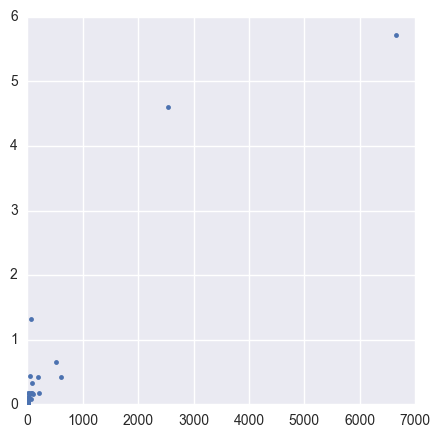

In [6]:
# Create a matplotlib figure
plt.figure()
# Generate a scatterplot inside the figure
plt.plot(mammals.bodywt, mammals.brainwt, '.')
# Show the plot
plt.show()

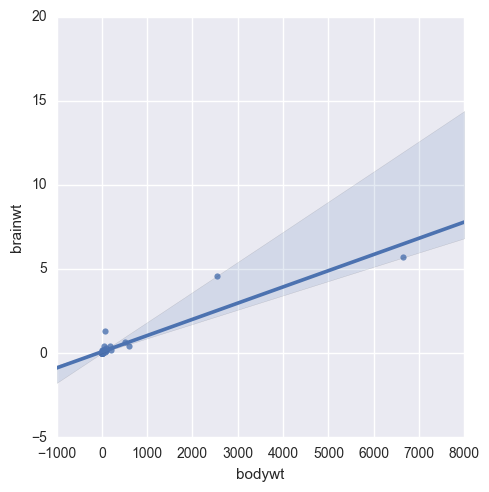

In [7]:
# Do it using the Seaborn library!
# https://web.stanford.edu/~mwaskom/software/seaborn/generated/seaborn.lmplot.html
sns.lmplot('bodywt', 'brainwt', mammals)

Notice:
1. The lmplot() function returns a straight line. That is why it is a linear solution. If we had multiple variables, the solution would be a linear plane.
2. The linear solution does explain a portion of the data well, but because both "bodywt" and "brainwt" are log-log distributions, outliers have a large impact on the gradient of the linear solution. We can see this from the wide and inconsistently shaped confidence intervals that seaborn's lmplot generates.

In [ ]:
# bodywt and brainwt look like they may not be normally distributed, let's check that
fig, axs = plt.subplots(2,1)
sns.distplot(mammals['bodywt'], color='red', ax=axs[0])
sns.distplot(mammals['brainwt'], color='green', ax=axs[1])

Because both variables are a log-log distribution, some properties of the underlying maths allow us to transform them into normal distributions. Then, we can solve for the linear regression!

In [ ]:
# Let's try log-transforming bodywt and brainwt
log_columns = ['bodywt', 'brainwt']
log_mammals = mammals.copy()
log_mammals[log_columns] = log_mammals[log_columns].apply(np.log10)

NameError: name 'log_mammals' is not defined

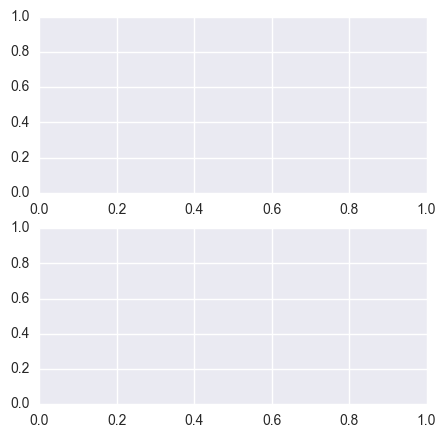

In [12]:
# This looks better
fig, axs = plt.subplots(2,1)
sns.distplot(log_mammals['bodywt'], color='red', ax=axs[0])
sns.distplot(log_mammals['brainwt'], color='green', ax=axs[1])

In [ ]:
# Look at the log-transformed scatter
sns.lmplot(x='bodywt', y='brainwt', data=log_mammals)

N.B. Even though we changed the way the data was shaped, this is still a linear result: it's just linear in the log10 of the data, instead of in the data's natural state.

## Guided Practice: Using seaborn to generate single variable linear model plots
Update and complete the code below to use lmplot and display correlations between body weight and two dependent variables: sleep_rem and awake.

In [ ]:
log_columns = ['bodywt', 'brainwt','sleep_rem','awake']  # any others?
log_mammals = mammals.copy()
log_mammals[log_columns] = log_mammals[log_columns].apply(np.log10)

# Add code here to create two graphs displaying correlations between sleep_rem and awake (as y) and body weight (as x)
sns.lmplot(x='bodywt', y='sleep_rem', data=log_mammals)
sns.lmplot(x='bodywt', y='sleep_rem', data=log_mammals)

## Introduction: Single Regression Analysis in statsmodels & scikit-learn

In [ ]:
# This is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

X = mammals[['bodywt']]
y = mammals['brainwt']

In [ ]:
# note difference between mammals[['bodywt']] (returns a DataFrame)
print type(X)
X.head()

In [ ]:
# ... and mammals['bodywt'] (returns a Series)
print type(y)
y.head()

In [ ]:
# Create a fitted model in one line with the following syntax formula:
#     outcome ~ predictor1 + predictor2 ... predictorN

lm = smf.ols(formula='y ~ X', data=mammals).fit()

# Print the full linear model summary
lm.summary()

#### Use Statsmodels to make the prediction for a mammal with bodyweight = 50

In [ ]:
# You have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'X': [50]})
X_new.head()

In [ ]:
lm.predict(X_new)

### Repeat in scikit-learn with handy plotting

When modelling with sklearn, you'll use the following basic principles:

- All sklearn estimators (modelling classes) are follow the same "base estimator" design. This allows you to easily rotate through estimators without changing much code.
- All estimators take a matrix X (can be either sparse or dense).
- Many estimators also take a vector of outcome labels, y, when working on a supervised machine learning problem. Regressions are supervised learning because we already have examples of our outcome variable y for every row in X.
- All estimators have parameters that can be set. This allows for customization and higher level of detail to the learning process. The parameters are unique to each estimator algorithm.
- Finally, note the convention of capital letters for a matrix (e.g. X) vs lower case for a vector (e.g. y).

In [ ]:
# Online documentation is very handy! http://scikit-learn.org/stable/modules/linear_model.html
from sklearn import feature_selection, linear_model

# Create matrix of features (only one used for now) + vector of outcome labels
X = mammals[['bodywt']]
y = mammals['brainwt']

# Create instance of LinearRegression class and fit model to the data
lm = linear_model.LinearRegression()
lm.fit(X, y)

# Ignore warning

In [ ]:
# lm is just a "LinearRegression" object
lm

In [ ]:
# coefs
print "lm.coef_"
print lm.coef_

In [ ]:
# residuals
print "residuals"
print (y - lm.predict(X)).values

In [6]:
# Let's wrap this into a function that's model-independent

def get_linear_model_metrics(X, y, algo):
    """
    Get the p-value of X given y, ignore f-stat for now
    """
    pvals = feature_selection.f_regression(X, y)[1]
    # Start with an empty linear regression object
    # .fit() runs the linear regression function on X and y
    algo.fit(X,y)
    residuals = (y - algo.predict(X)).values

    # Print the necessary values
    print 'P Values:', pvals
    print 'Coefficients:', algo.coef_
    print 'y-intercept:', algo.intercept_
    print 'R-Squared:', algo.score(X,y)

    # Visualise distribution of the residuals
    plt.figure()
    plt.hist(residuals, bins=np.ceil(np.sqrt(len(y))))
    plt.title("Distribution of residuals")
    
    # Keep the model
    return algo


In [ ]:
# Let's try it out by building a linear model representing brainwt ~ bodywt
# (remember this model is represented as: `brainwt = bodywt * coefficient + intercept`)
X = mammals[['bodywt']]
y = mammals['brainwt']

# Let's visualise this model too
sns.lmplot(x='bodywt', y='brainwt', data=mammals, ci=None)
plt.title("Linear model on untransformed data: brainwt ~ bodywt")

lm = linear_model.LinearRegression()
lm = get_linear_model_metrics(X, y, lm)  # note how lm object is passed into the function, then returned

## Demo: Significance is Key

### What does our output tell us?

Answer: The relationship between bodywt and brainwt is significant
The model explains roughly 87%  of the variance in the dataset
With the current model, brainwt is roughly bodywt * 0.00096395
Specifically, brainwt = 0.00096395 * brainwt + 0.0859
The residuals are not normally districuted (there are outliers). A better fit will have residuals that look normally distributed

### Evaluating Fit, Evaluating Sense

Although we know there is a better solution to the model, we should evaluate some other "common sense" things first. For example, given this model, what is an animal's brainwt if their bodywt is 0?

In [ ]:
# What's the prediction at 0? Does it make sense?
print lm.predict([[0]])

In [ ]:
# A mammal with zero body weight should also have zero brain weight!

# Let's force the intercept to be zero & retrain the model
lm = linear_model.LinearRegression(fit_intercept=False)
lm = get_linear_model_metrics(X, y, lm)

In [ ]:
# What's the prediction at 0 now?
print lm.predict([[0]])

### Intrepretation
With linear modeling we call this part of the linear assumption. Consider it a test to the model. If an animal's body weights nothing, we expect their brain to be nonexistent. That given, we can improve the model by telling sklearn's LinearRegression object we do not want to fit a y intercept.

Now, the model fits where brainwt = 0, bodywt = 0.
Because we start at 0, the large outliers have a greater effect, so the coefficient has increased.
Fitting with this assumption also results in a model that explains slightly less of the variance.

## Guided Practice: Using the LinearRegression object

We learned earlier that the data in its current state does not allow for the best linear regression fit. 

With a partner, generate two more models using the log-transformed data to see how this transform changes the model's performance.

Complete the following code to update X and y to match the log-transformed data. Complete the loop by setting the list to be one True and one False.

In [ ]:
# Starter
X = mammals[['bodywt']].apply(np.log10)
y = mammals['brainwt'].apply(np.log10)
loop = [True, False]
for boolean in loop:
    print 'y-intercept:', boolean
    lm = linear_model.LinearRegression(fit_intercept=boolean)
    get_linear_model_metrics(X, y, lm)
    print

### Which model performed the best? The worst? Why?


Answer: Log data, fit_intercept = True. Reason: Good R Squared, normally distributed residuals

> For more information on how scikit-learn's LinearRegression calculates R-squared, see:
> http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score
> 
> _"Best possible R^2 score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0._

## Demo: Advanced linear regression techniques
We will go over different estimators in detail in the future but check it out in the docs if you're curious (and finish a little early).

In [ ]:
# Loading other sklearn regression estimators
X = log_mammals[['bodywt']]
y = log_mammals['brainwt']

# Docs = http://scikit-learn.org/stable/modules/linear_model.html
estimators = [
    linear_model.Lasso(),
    linear_model.Ridge(),
    linear_model.ElasticNet(),
]

for est in estimators:
    print est
    get_linear_model_metrics(X, y, est)
    print "\n\n"

## Demo: Multiple regression analysis with citibike data

In the previous example, one variable explained the variance of another; however, more often than not, we will need multiple variables. 

For example, a house's price may be best measured by square feet, but a lot of other variables play a vital role: bedrooms, bathrooms, location, appliances, etc. 

For a linear regression, we want these variables to be largely independent of each other, but all of them should help explain the y variable.

We'll work with bikeshare data to showcase what this means and to explain a concept called multicollinearity.

For more details on this dataset, including a data dictionary, please see: https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

In [14]:
bike_data = pd.read_csv(str(DATA_DIR / 'bikeshare.csv'))
bike_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### What is multicollinearity?

With the bike share data, let's compare three data points: actual temperature (**`temp`**), "feel" temperature (**`atemp`**), and guest ridership (**`casual`**).

Our data is already normalized between 0 and 1, so we'll start off with the correlations and modelling.

In [ ]:
colour_map = sns.diverging_palette(220, 10, as_cmap=True)

correlations = bike_data[['temp', 'atemp', 'casual']].corr()
print correlations
print sns.heatmap(correlations, cmap=colour_map)

#### The correlation matrix explains that:

- both temperature fields are somewhat correlated to guest ridership (corr approx 0.5 isn't high, but not low either)
- the two temperature fields are highly correlated to each other.


Including both of these fields in a model could introduce a pain point of multicollinearity, where it's more difficult for a model to determine which feature is affecting the predicted value.

### We can measure this effect in the coefficients:

In [ ]:
y = bike_data['casual']
x_sets = (
    ['temp'],
    ['atemp'],
    ['temp', 'atemp'],
)

for x in x_sets:
    print 'Model: casual ~ ' + ' + '.join(x)
    get_linear_model_metrics(bike_data[x], y, linear_model.LinearRegression())
    print

###  Intrepretation: 
Even though the 2-variable model (**`casual ~ temp + atemp`**) has a higher explanation of variance than two variables on their own, and both variables are considered significant (p values approaching 0), we can see that together, their coefficients are wildly different. 

This can introduce error in how we explain models.

### What happens if we use a second variable that isn't highly correlated with temperature, like humidity?


In [ ]:
print sns.heatmap(bike_data[['temp', 'hum', 'casual']].corr(),
                  cmap=colour_map)

y = bike_data['casual']
x = bike_data[['temp', 'hum']]
get_linear_model_metrics(x, y, linear_model.LinearRegression())

While temperature's coefficient is higher, the logical output still makes sense: for guest riders we expected a positive relationship with temperature and a negative relationship with humidity, and our model suggests it as well.

## Guided Practice: Multicollinearity with dummy variables

There can be a similar effect from a feature set that is a singular matrix. This happens is when there is a clear relationship in the matrix (for example, the sum of all rows = 1).

### Run through the following code on your own.
#### What happens to the coefficients when you include all weather situations instead of just including all except one?

In [ ]:
# From https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset
# weathersit : 
# - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
weather = pd.get_dummies(bike_data.weathersit)
print weather[:20]
bike_data[:20]

In [ ]:
# Model casual by all weather situations as dummy variables
lm = linear_model.LinearRegression()
get_linear_model_metrics(weather[[1, 2, 3, 4]], y, lm)

In [ ]:
# Drop the least significant: weather situation  = 4
get_linear_model_metrics(weather[[1, 2, 3]], y, lm)

### Similar in Statsmodels

In [ ]:
# All dummies in the model
lm_stats = smf.ols(formula='y ~ weather[[1, 2, 3, 4]]', data=bike_data).fit()
lm_stats.summary()

In [ ]:
# Drop one
lm_stats = smf.ols(formula='y ~ weather[[1, 2, 3]]', data=bike_data).fit()
lm_stats.summary()

### What's the interpretation ? Do you want to keep all your dummy variables or drop one? Why? 




Answer: 

## Guided Practice: Combining non-correlated features into a better model

In [ ]:
bike_data.dtypes

### With a partner, complete this code together and visualize the correlations of all the numerical features built into the data set.

We want to:

- Add the three significant weather situations into our current model.
- Find two more features that are not correlated with current features, but could be strong indicators for predicting guest riders.

In [ ]:
# Starter 
lm = linear_model.LinearRegression()
weather_dummies = pd.get_dummies(bike_data.weathersit, prefix='Weathersit').iloc[:, 1:]
hour_dummies = pd.get_dummies(bike_data.hr, prefix='Hour').iloc[:, 1:]

#bikemodel_data = pd.concat([bike_data, weather_dummies, hour_dummies], axis=1)
# print bikemodel_data[:20]
print bikemodel_data.dtypes

colour_map = sns.diverging_palette(220, 10, as_cmap=True)
correlations = bike_data[['temp', 'hum', 'windspeed', 'casual']].corr()
print correlations
print sns.heatmap(correlations, cmap=colour_map)

columns_to_keep = ['temp', 'hum', 'windspeed', 'Weathersit_2', 'Weathersit_3', 'Weathersit_4',
                  'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7',
                   'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14', 
                   'Hour_15', 'Hour_16', 'Hour_17',
                   'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22',
                   'Hour_23']  #[which variables?]
final_feature_set = bikemodel_data[columns_to_keep]

get_linear_model_metrics(final_feature_set, y, lm)


In [ ]:
# Using sklearn + log-transformed y
final_feature_set = bikemodel_data[columns_to_keep]
get_linear_model_metrics(final_feature_set, np.log10(y + 1), lm)

In [ ]:
# Using Statsmodels + log-transformed y
log_y = np.log10(y + 1)
lm = smf.ols(formula='log_y ~ temp + hum + windspeed + weather_1 + weather_2 + weather_3 + holiday + hour_1 + hour_2 + hour_3 + hour_4 + hour_5 + hour_6 + hour_7 + hour_8 + hour_9 + hour_10 + hour_11 + hour_12 + hour_13 + hour_14 + hour_15 + hour_16 + hour_18 + hour_19 + hour_20 + hour_21 + hour_22 + hour_23', data=bikemodel_data).fit()
# Print the full summary
lm.summary()

## Independent Practice / Homework: Building models for other y variables

We've completed a model together that explains casual guest riders. Now it's your turn to build another model, using a different y variable: registered riders.

#### Pay attention to:

* the distribution of riders (should we rescale the data?)
* checking correlations with variables and registered riders
* having a feature space (our matrix) with low multicollinearity
* model complexity vs explanation of variance: at what point do features in a model stop improving r-squared?
* the linear assumption -- given all feature values being 0, should we have no ridership? negative ridership? positive ridership?

#### Bonus

* Which variables would make sense to dummy (because they are categorical, not continuous)?
* What features might explain ridership but aren't included in the data set?
* Is there a way to build these using pandas and the features available?
* Outcomes: If your model at least improves upon the original model and the explanatory effects (coefficients) make sense, consider this a complete task.

### If your model for registered riders has an r-squared above .4, this a relatively effective model for the data available. Kudos!

    instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0         1  2011-01-01       1   0     1   0        0        6           0   
1         2  2011-01-01       1   0     1   1        0        6           0   
2         3  2011-01-01       1   0     1   2        0        6           0   
3         4  2011-01-01       1   0     1   3        0        6           0   
4         5  2011-01-01       1   0     1   4        0        6           0   
5         6  2011-01-01       1   0     1   5        0        6           0   
6         7  2011-01-01       1   0     1   6        0        6           0   
7         8  2011-01-01       1   0     1   7        0        6           0   
8         9  2011-01-01       1   0     1   8        0        6           0   
9        10  2011-01-01       1   0     1   9        0        6           0   
10       11  2011-01-01       1   0     1  10        0        6           0   
11       12  2011-01-01       1   0     1  11       

/Users/rhyscater/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
/Users/rhyscater/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

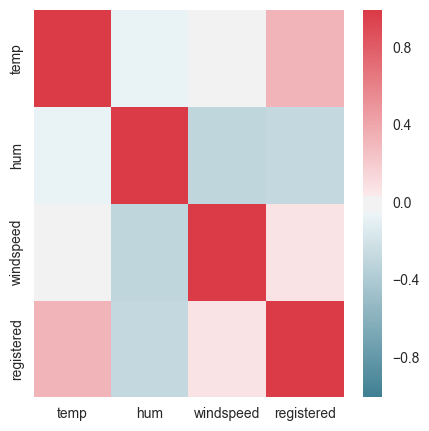

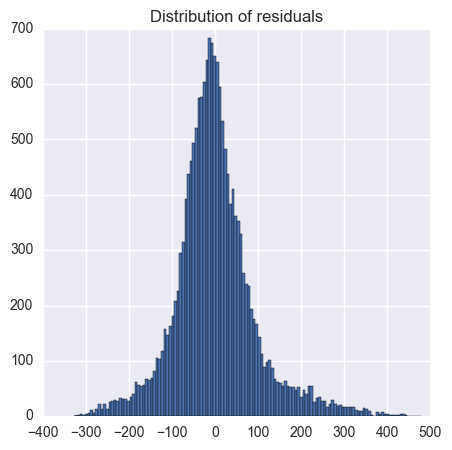

In [7]:
# Model away!
bike_data = pd.read_csv(str(DATA_DIR / 'bikeshare.csv'))

from sklearn import feature_selection, linear_model

# Starter 
lm = linear_model.LinearRegression()
y = bike_data['registered']
weather_dummies = pd.get_dummies(bike_data.weathersit, prefix='Weathersit').iloc[:, 1:]
hour_dummies = pd.get_dummies(bike_data.hr, prefix='Hour').iloc[:, 1:]
workingday_dummies = pd.get_dummies(bike_data.workingday, prefix='workingday').iloc[:, 1:]


bikemodel_data = pd.concat([bike_data, weather_dummies, hour_dummies, workingday_dummies], axis=1)
print bikemodel_data[:20]
print bikemodel_data.dtypes

colour_map = sns.diverging_palette(220, 10, as_cmap=True)
correlations = bike_data[['temp', 'hum', 'windspeed', 'registered']].corr()
print correlations
print sns.heatmap(correlations, cmap=colour_map)

columns_to_keep = ['temp', 'hum', 'windspeed', 'Weathersit_2', 'Weathersit_3', 'Weathersit_4',
                  'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7',
                   'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14', 
                   'Hour_15', 'Hour_16', 'Hour_17',
                   'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22',
                   'Hour_23', 'workingday_1']  #[which variables?]
final_feature_set = bikemodel_data[columns_to_keep]

get_linear_model_metrics(final_feature_set, y, lm)



P Values: [  0.00000000e+000   0.00000000e+000   4.03672389e-052   7.41985069e-002
   1.81611717e-052   5.78302135e-001   3.17877790e-189   0.00000000e+000
   0.00000000e+000   0.00000000e+000   8.69207390e-247   4.72724349e-027
   8.34309970e-016   4.47200263e-099   4.83948275e-047   4.04824373e-011
   4.99938357e-021   2.12255834e-044   1.78421129e-042   1.30222997e-031
   4.01174012e-039   7.78246894e-082   1.73028284e-168   1.67335076e-152
   6.41626171e-090   4.37903898e-043   1.96091360e-017   1.40458515e-003
   4.48814810e-007   1.54475939e-011]
Coefficients: [ 0.6712003  -0.0963271  -0.15163163 -0.00812185 -0.23142618 -0.07999922
 -0.26386895 -0.47306194 -0.67956233 -0.78671941 -0.34030928  0.1612956
  0.57598568  0.84637392  0.68278284  0.49238061  0.53392643  0.62240995
  0.60460997  0.55583124  0.58513204  0.72092207  0.91376491  0.89344618
  0.76950898  0.64506913  0.53606119  0.42724569  0.25642903  0.05301339]
y-intercept: 1.29169740848
R-Squared: 0.767872482664


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

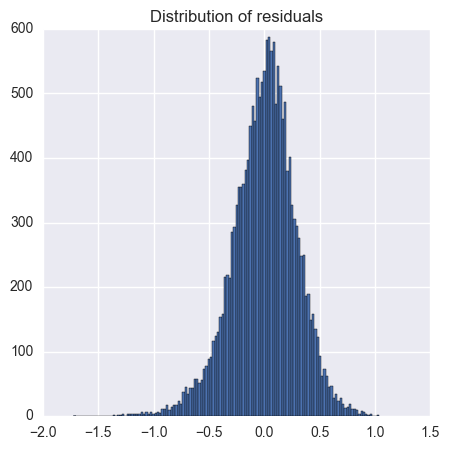

In [8]:
# Using sklearn + log-transformed y
final_feature_set = bikemodel_data[columns_to_keep]
get_linear_model_metrics(final_feature_set, np.log10(y + 1), lm)

# Why logged data?

Lots of human behaviour follows a loglog distribution.

Check the distribution of the y alone. Looks log normal.

Logged y looks more normally distributed.

Axes(0.125,0.125;0.775x0.775)


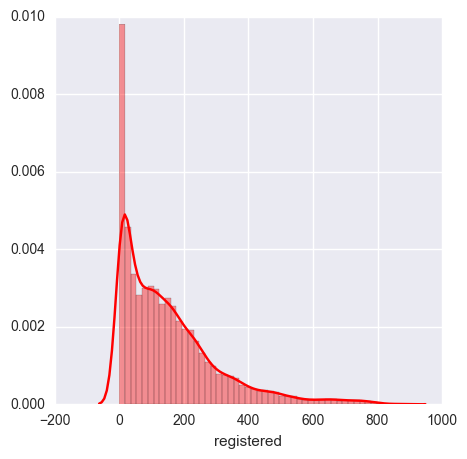

In [32]:
bike_data = pd.read_csv(str(DATA_DIR / 'bikeshare.csv'))

# print sns.lmplot('registered', 'temp', bike_data)

#fig, axs = plt.subplots(2,1)
print sns.distplot(bike_data['registered'], color='red')
#sns.distplot(bike_data['temp'], color='green', ax=axs[1])

In [21]:
log_columns = ['registered', 'temp']
log_bikes = bike_data.copy()
log_bikes[log_columns] = np.log10(log_bikes[log_columns] + 1)

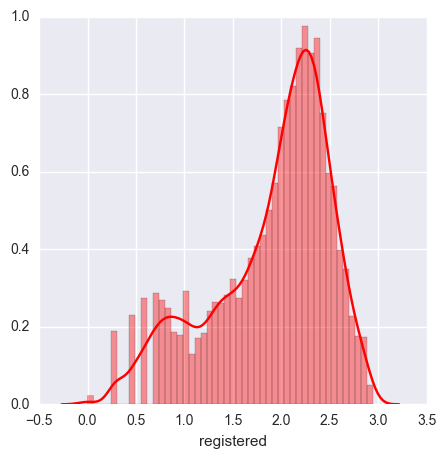

In [34]:
#sns.lmplot('registered', 'temp', log_bikes)

#fig, axs = plt.subplots(2,1)
sns.distplot(log_bikes['registered'], color='red')
#sns.distplot(log_bikes['temp'], color='green', ax=axs[1])